# Análisis de Procesamiento de Lenguaje Natural (PLN)

## Exercise 1
Dado el conjunto de datos de reseñas, podemos responder preguntas como:
- ¿Cuáles son los factores más importantes que generan críticas negativas?
- ¿Un cambio de política reciente mejoró nuestras revisiones?

Sin embargo, para responder preguntas más específicas, como:
- ¿Cuál es la tendencia de las críticas a lo largo del tiempo?
necesitaríamos datos adicionales como información temporal.

# Tokenizacion  #
Proceso en el cual se realiza la separacion por palabras de todos las reseñas. 


In [2]:
import nltk
import pandas as pd

nltk.download('punkt')
nltk.download('punkt_tab')

# Cargar el archivo CSV
data = pd.read_csv('../data/sdata.csv', nrows=5000)  # Cargar las primeras 5000 filas
allReviews = data['text']  # Extraer la columna de texto

tokesReview ={}#arreglo de tokens

for iterador, review in enumerate(allReviews):
    
    # Tokenizar la reseña
    tokens = nltk.word_tokenize(review)
    review_id = data.iloc[iterador]['review_id']

    # Asignar los tokens a su 'review_id' correspondiente
    tokesReview[review_id] = tokens

    # Incrementamos el iterador
    iterador += 1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brahi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\brahi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Exercise 2 #
Realizar un análisis exploratorio de los tamaños de las reseñas: encontrar la más corta y la más larga y trazar un histograma de la distribución de las longitudes de las reseñas.

Reseña más corta (longitud 6 palabras):
6

Reseña más larga (longitud 1105 palabras):
1105



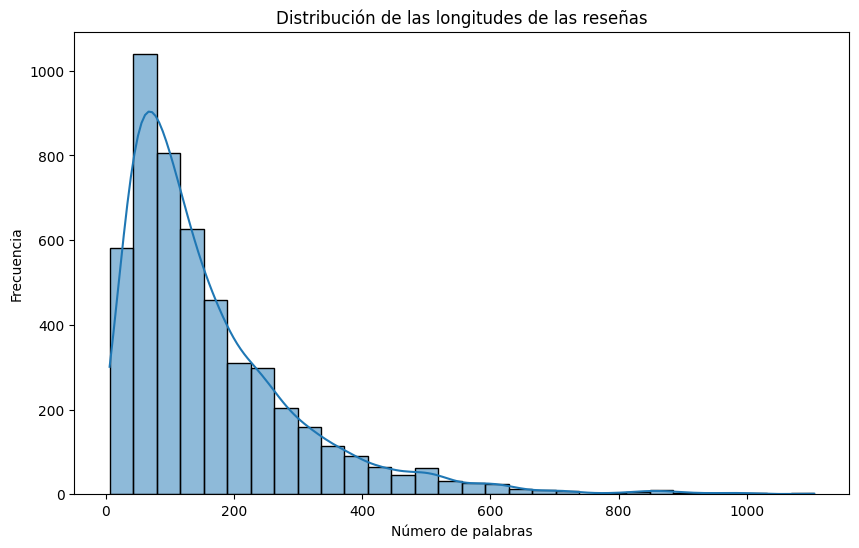

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir una nueva columna 'review_length' utilizando el diccionario 'tokesReview'
data['review_length'] = data['review_id'].apply(lambda review_id: len(tokesReview[review_id]))


# Encontramos la reseña más corta y la más larga
shortest_review = data.loc[data['review_length'].idxmin()]['review_length']
longest_review = data.loc[data['review_length'].idxmax()]['review_length']

print(f"Reseña más corta (longitud {data['review_length'].min()} palabras):\n{shortest_review}\n")
print(f"Reseña más larga (longitud {data['review_length'].max()} palabras):\n{longest_review}\n")

# Graficar el histograma de longitudes de reseñas
plt.figure(figsize=(10,6))
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title("Distribución de las longitudes de las reseñas")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()


## Exercise 3
Crear una función `word_cloud_rating(data, star_value)` para construir una nube de palabras a partir de las reseñas que tienen un valor específico de estrellas. Visualizar los resultados para reseñas de 1 estrella.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brahi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brahi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


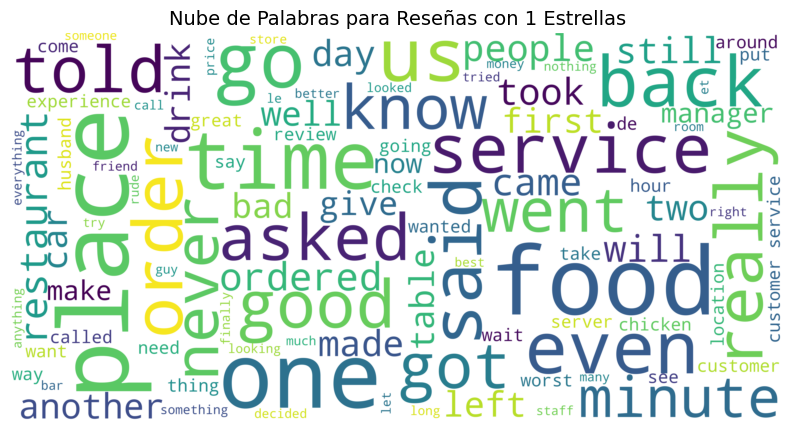

In [4]:
from nltk.corpus import stopwords  # Asegúrate de importar el corpus de stopwords

nltk.download('stopwords')

# Eliminamos los stopwords en inglés
stop_words = set(stopwords.words('english'))  # Cambia 'english' por el idioma que corresponda
tokens_clean = [word for word in tokens if word.lower() not in stop_words]

from nltk.corpus import stopwords  # Asegúrate de importar el corpus de stopwords


# Importar las bibliotecas necesarias
from wordcloud import WordCloud

# Definir la función word_cloud_rating
def word_cloud_rating(data, star_value):
    # Filtrar las reseñas que corresponden a un valor específico de estrellas
    subset_data = data[data['stars'] == star_value]
    
    # Unir todas las reseñas en un solo texto
    word_cloud_text = ' '.join(subset_data['text'])
    
    # Generar la nube de palabras
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=10, width=800, height=400).generate(word_cloud_text)
    
    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Nube de Palabras para Reseñas con {star_value} Estrellas', fontsize=14)
    plt.show()

# Llamar a la función para las reseñas de 1 estrella
word_cloud_rating(data, 1)

## Exercise 4
Investigar por qué la palabra 'good' aparece con frecuencia en las reseñas negativas y proporcionar una explicación razonable.

In [5]:
# Filtrar las reseñas de 1 estrella
negative_reviews = data[data['stars'] == 1]['text']

# Buscar las reseñas que contienen la palabra "good"
reviews_with_good = negative_reviews[negative_reviews.str.contains('good', case=False)]

# Imprimir algunas reseñas que contienen la palabra "good"
for i, review in enumerate(reviews_with_good.head(5)):
    print(f"Reseña {i+1}:\n{review}\n")


Reseña 1:
after reading the reviews on yelp, my boyfriend and i decided to give this place a try, especially since we are on a mission to try ramen in every city we visit.

we were really excited, as when we were in NYC, we had really good ramen. 

listening to the reviews we started off with the gyoza appetizer - which was not as good as everyone says it is. It was pan fried with the thin layer of skin, but there was an aftertaste of soap water. Which I should have known, since the glass of water they served us was disgusting!

We had ordered the jumbo sumo ramen - beware, it is a very big bowl of noodles, which we did not expect.

The sumo ramen came with a half boil egg, seaweed, pork belly, and other veggies. The noodles and pork belly was good. Soup was tasteless.

Definitely would not go back again.

Reseña 2:
Came here for a friend's birthday. She had looked it up and thought it sound good. First of all, when we made reservations, they only had a 7pm time slot for us (we were lo

## Exercise 5
Encontrar todas las palabras de alta frecuencia (top 1%) y de baja frecuencia (bottom 1%) en las reseñas en general usando la función `Counter()` de la clase `collections`.

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

from nltk.corpus import stopwords  # Asegúrate de importar el corpus de stopwords

nltk.download('stopwords')

# Eliminamos los stopwords en inglés
stop_words = set(stopwords.words('english'))  # Cambia 'english' por el idioma que corresponda
tokens_clean = [word for word in tokens if word.lower() not in stop_words]

# Crear la matriz palabra-documento
vec = CountVectorizer()
X = vec.fit_transform(data['text'])  # Aplicamos la vectorización a las reseñas (campo 'text')

# Convertir la matriz en un DataFrame para facilitar el análisis
word_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

# Contar la frecuencia total de cada palabra en todo el corpus
word_freq = Counter(dict(word_matrix.sum(axis=0)))

# Obtener el 1% superior e inferior de las palabras según su frecuencia
total_words = len(word_freq)
top_1_percent_count = int(total_words * 0.01)
bottom_1_percent_count = int(total_words * 0.01)

# Ordenar las palabras por frecuencia
sorted_words = word_freq.most_common()

# Top 1% palabras de alta frecuencia
top_1_percent_words = sorted_words[:top_1_percent_count]

# Bottom 1% palabras de baja frecuencia
bottom_1_percent_words = sorted_words[-bottom_1_percent_count:]

# Mostrar resultados
print("Top 1% palabras más frecuentes:")
for word, freq in top_1_percent_words:
    print(f"{word}: {freq}")

print("\nBottom 1% palabras menos frecuentes:")
for word, freq in bottom_1_percent_words:
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brahi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 1% palabras más frecuentes:
the: 34376
and: 22897
to: 16214
it: 11977
was: 11840
of: 10960
is: 8492
for: 8283
in: 7918
that: 6857
you: 6074
my: 5976
with: 5815
they: 5795
but: 5599
this: 5283
on: 5220
we: 4913
have: 4472
not: 4104
had: 3841
so: 3649
at: 3398
are: 3358
were: 3341
as: 3274
there: 3057
be: 3021
place: 2975
good: 2893
me: 2815
food: 2716
here: 2422
out: 2389
if: 2380
all: 2375
just: 2337
one: 2323
very: 2304
like: 2301
great: 2088
up: 2019
when: 1997
their: 1994
time: 1974
from: 1952
or: 1927
can: 1914
get: 1873
our: 1861
really: 1846
would: 1818
which: 1756
some: 1728
an: 1714
go: 1677
back: 1634
service: 1624
also: 1622
what: 1597
about: 1589
your: 1526
been: 1489
will: 1408
more: 1405
ve: 1386
no: 1290
well: 1282
only: 1247
she: 1247
by: 1239
them: 1236
because: 1219
don: 1219
nice: 1202
little: 1169
ordered: 1147
he: 1145
other: 1136
do: 1124
has: 1094
than: 1085
even: 1081
too: 1071
us: 1021
try: 988
always: 974
came: 961
after: 953
menu: 950
pretty: 938
love: 933

## Exercise 6
Escribir una función llamada `top_k_ngrams(word_tokens, n, k)` para imprimir los principales k n-gramas. Usar esta función para obtener los principales 10 1-gramas, 2-gramas y 3-gramas de las primeras 1000 reseñas.

## Exercise 7.1
Filtrar todas las stop words en la primera reseña de los datos de Yelp y mostrar la respuesta, así como las stop words encontradas.

## Exercise 7.2
Modificar la función `top_k_ngrams(word_tokens, n, k)` para eliminar las stop words antes de determinar los n-gramas.

## Exercise 8.1
Dividir los datos en 'buenas reseñas' (rating de estrellas mayor a 3) y 'malas reseñas' (rating de estrellas menor o igual a 3) y hacer un gráfico de barras de las 20 palabras principales en cada caso.

## Exercise 8.2
Usar la función `get_top_n_words()` para encontrar los 20 principales bigramas y trigramas (en malas y buenas reseñas). Evaluar si los resultados son útiles.

## Exercise 9.1
Observar que muchos de los importantes bigramas 'malos' incluyen las palabras 'like' o 'just'. Dar ideas sobre cómo utilizar esta observación en el futuro preprocesamiento de las reseñas.

## Exercise 9.2
1. Escribir una queja que probablemente no se capte completamente mediante el análisis de bigramas.
2. Escribir un paso de procesamiento que solucione este problema.